# Import libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import missingno as msn
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, RidgeCV
from sklearn.metrics import mean_squared_error, r2_score

# Extract Dataset

In [2]:
df=pd.read_csv(r'..\datasets\diamonds.csv', index_col=0)

In [3]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [5]:
df.shape

(53940, 10)

# Missing Values

In [6]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

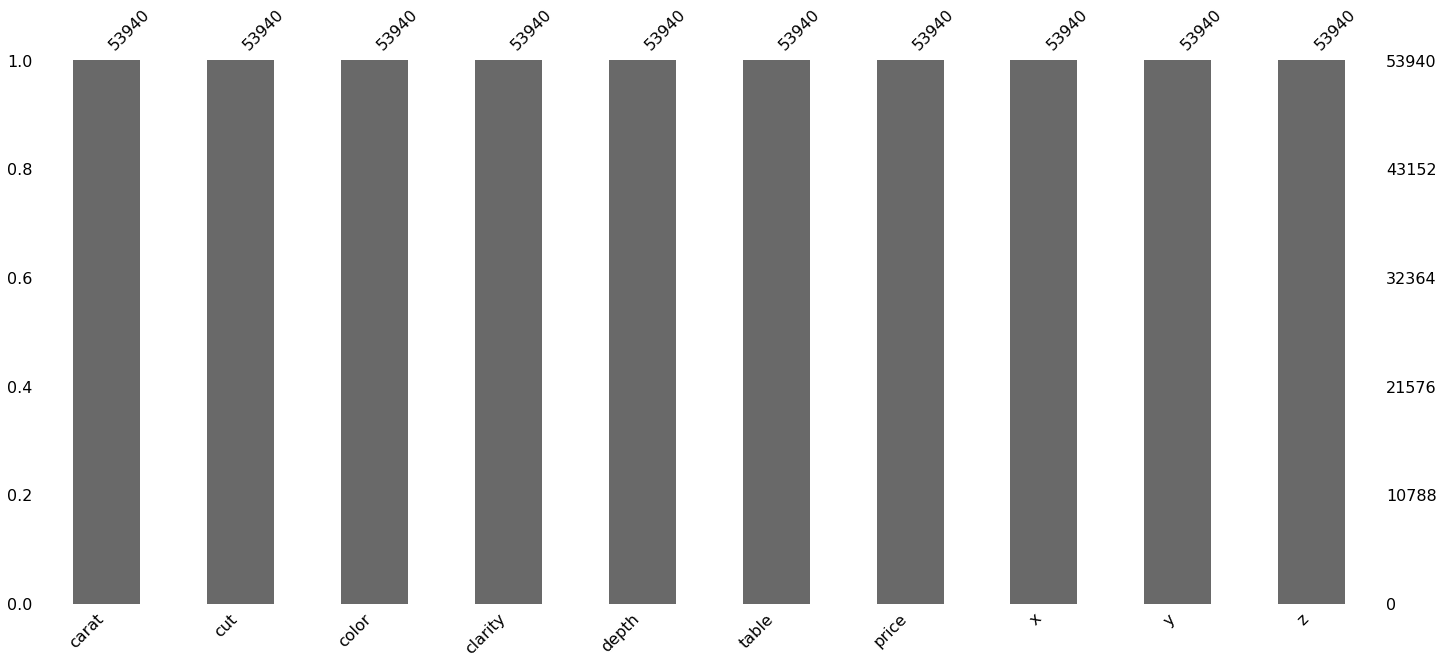

In [7]:
msn.bar(df)
plt.show()

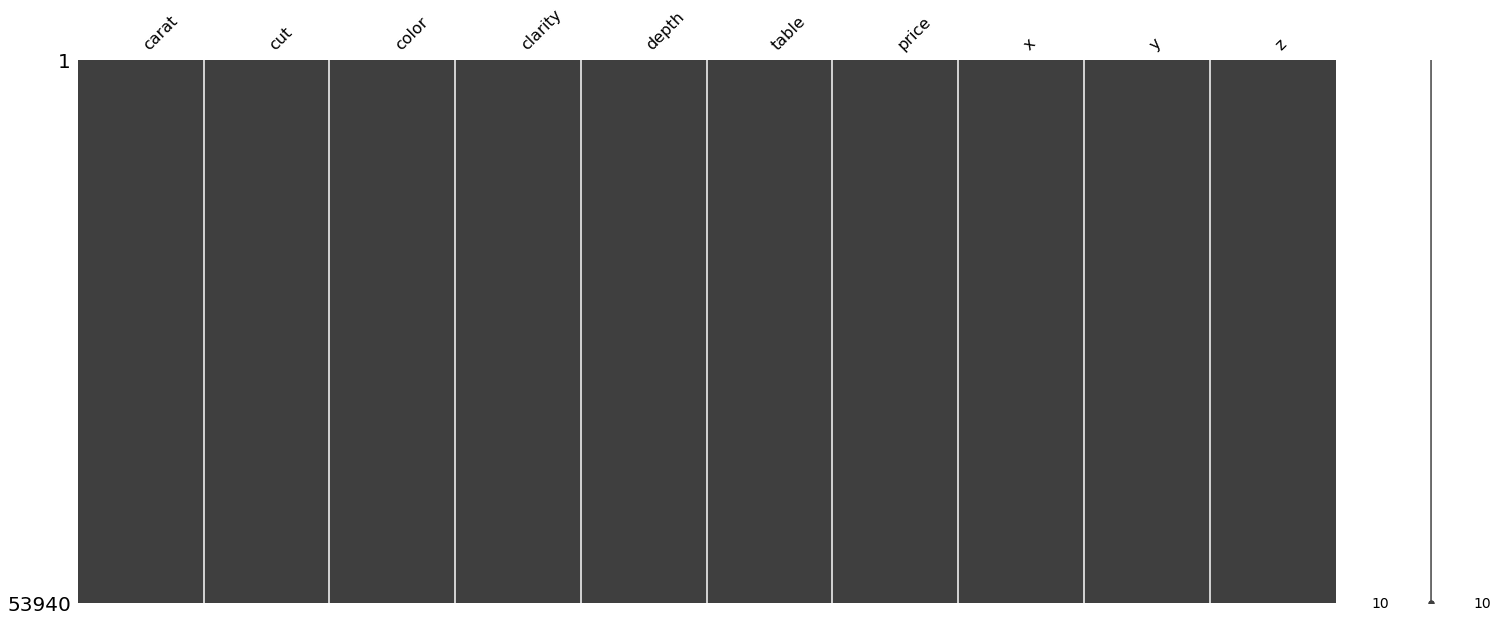

In [8]:
msn.matrix(df)
plt.show()

Values of X, Y and Z. It can't be possible..!! It doesn't make any sense to have either of Length or Width or Height to be zero.

In [9]:
df.loc[ (df.x==0) | (df.y==0) | (df.z==0) ].index

Int64Index([ 2208,  2315,  4792,  5472, 10168, 11183, 11964, 13602, 15952,
            24395, 24521, 26124, 26244, 27113, 27430, 27504, 27740, 49557,
            49558, 51507],
           dtype='int64')

In [10]:
len(df.loc[ (df.x==0) | (df.y==0) | (df.z==0) ].index)

20

We can see there are 20 rows with Dimensions 'Zero'.           
We'll Drop them as it seems better choice instead of filling them with any of Mean or Median

In [11]:
df.drop(df.loc[ (df.x==0) | (df.y==0) | (df.z==0) ].index, axis=0, inplace=True)

In [12]:
df.shape

(53920, 10)

# Exploratory Data Analysis

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53920.0,0.797698,0.473795,0.20,0.40,0.70,1.04,5.01
depth,53920.0,61.749514,1.432331,43.00,61.00,61.80,62.50,79.00
table,53920.0,57.456834,2.234064,43.00,56.00,57.00,59.00,95.00
price,53920.0,3930.993231,3987.280446,326.00,949.00,2401.00,5323.25,18823.00
x,53920.0,5.731627,1.119423,3.73,4.71,5.70,6.54,10.74
y,53920.0,5.734887,1.140126,3.68,4.72,5.71,6.54,58.90
z,53920.0,3.540046,0.702530,1.07,2.91,3.53,4.04,31.80


In [14]:
num_cols=df._get_numeric_data().columns
print(num_cols)

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z'], dtype='object')


In [15]:
cat_cols=list(set(df.columns)-set(num_cols))
print(cat_cols)

['clarity', 'cut', 'color']


##### Categorical variables

In [16]:
def bar_plot(data, col):
    
    v_c=data[col].value_counts()

    plt.figure(figsize = (9,3))
    sns.barplot(x=v_c.index, y=v_c.values)
    plt.ylabel("Frequency")
    plt.title(col)
    plt.show()
    print("{}:\n{}".format(col,v_c))

In [17]:
def pie_plot(data, col):
    labels = data[col].value_counts().index
    sizes = data[col].value_counts().values
    colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#fbdf70']

    plt.figure(figsize = (8,8))
    plt.pie(sizes, labels=labels, shadow = True, startangle=90, colors=colors, autopct='%1.1f%%')
    title=f"Distribution of Diamonds by {col}"
    plt.title(title, color = 'black', fontsize = 15)

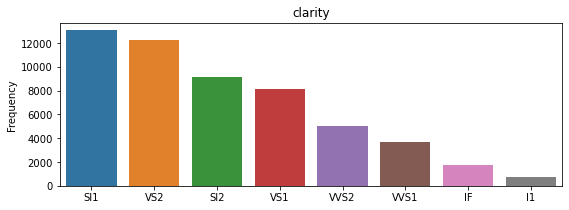

clarity:
SI1     13063
VS2     12254
SI2      9185
VS1      8170
VVS2     5066
VVS1     3654
IF       1790
I1        738
Name: clarity, dtype: int64


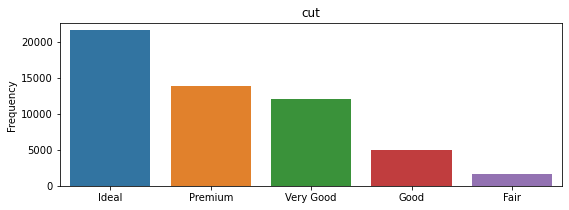

cut:
Ideal        21548
Premium      13780
Very Good    12081
Good          4902
Fair          1609
Name: cut, dtype: int64


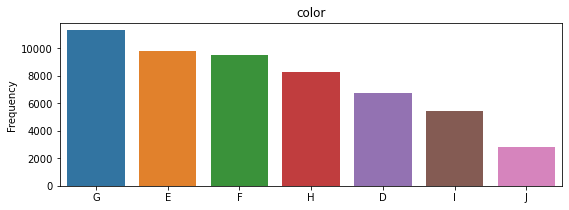

color:
G    11284
E     9797
F     9538
H     8298
D     6774
I     5421
J     2808
Name: color, dtype: int64


In [18]:
for col in cat_cols:
    bar_plot(df, col)

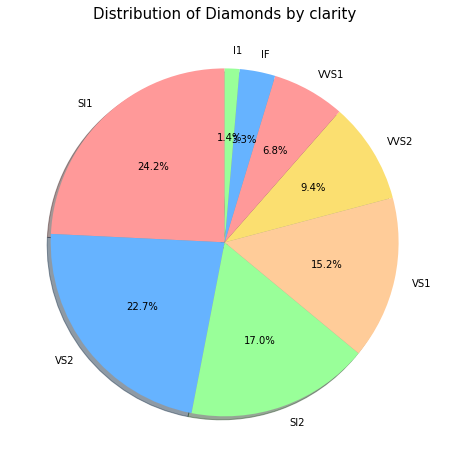

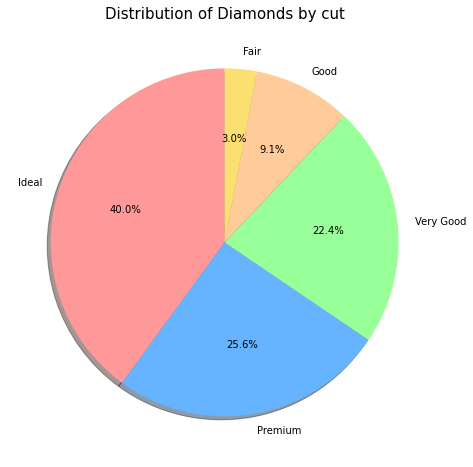

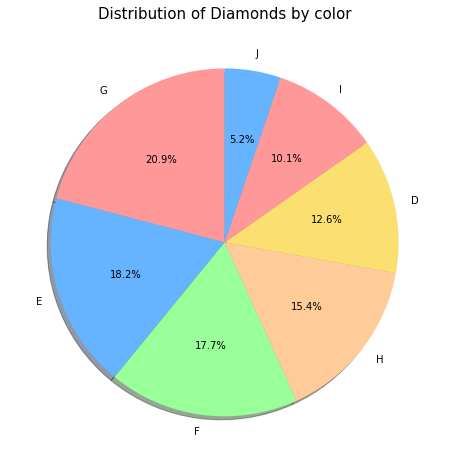

In [19]:
for col in cat_cols:
    pie_plot(df, col)

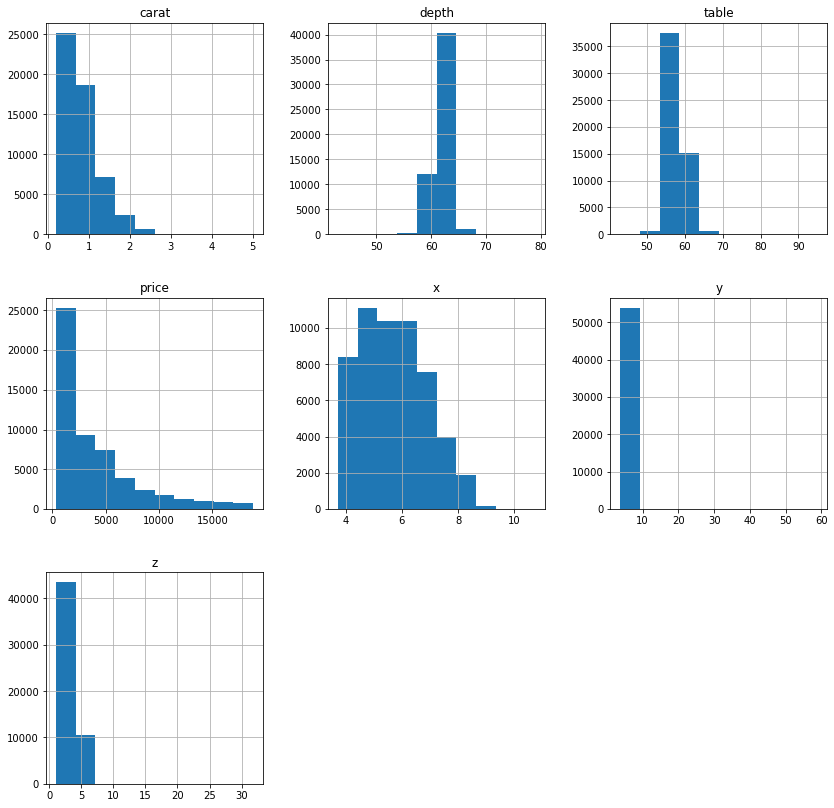

In [20]:
df[num_cols].hist(figsize=(14, 14))
plt.show()

##### Numerical Variables

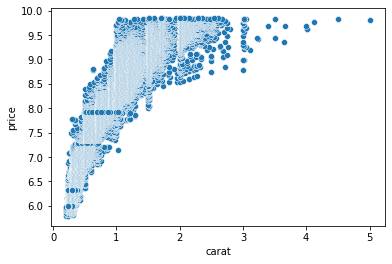

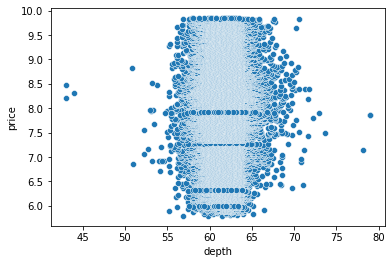

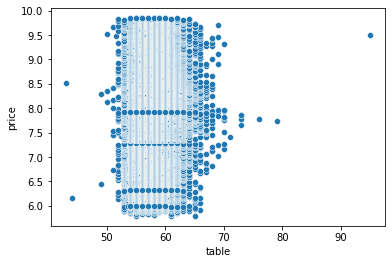

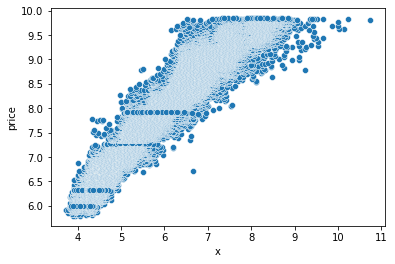

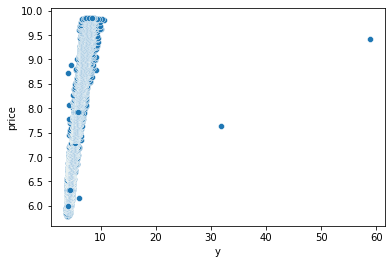

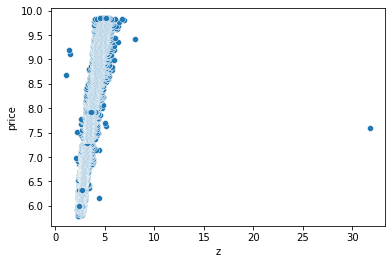

In [21]:
for col in num_cols:
    if col!='price':
        sns.scatterplot(x=df[col], y=np.log1p(df['price']))
        plt.show()

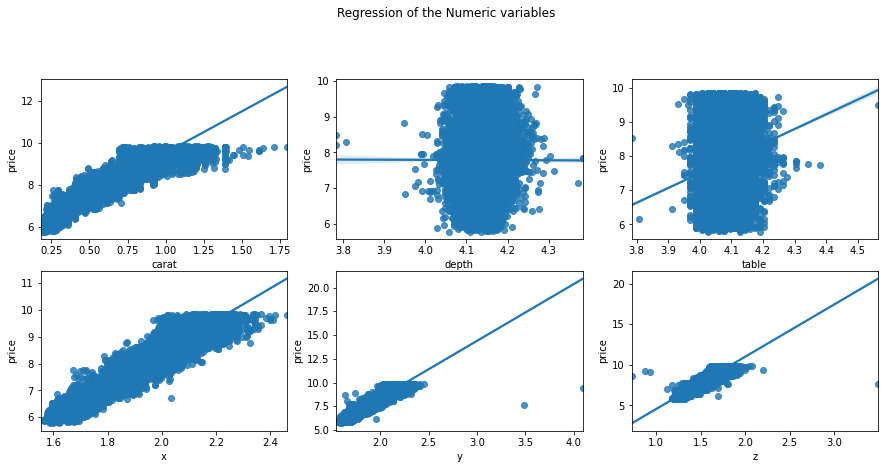

In [22]:
j=0
fig=plt.figure(figsize=(15,10))
plt.suptitle("Regression of the Numeric variables")
for col in num_cols:
    if col!='price':
        ax=plt.subplot(331+j)
        ax=sns.regplot(x=np.log1p(df[col]), y=np.log1p(df['price']))
        j=j+1

In [23]:
df.shape

(53920, 10)

#### Correlation

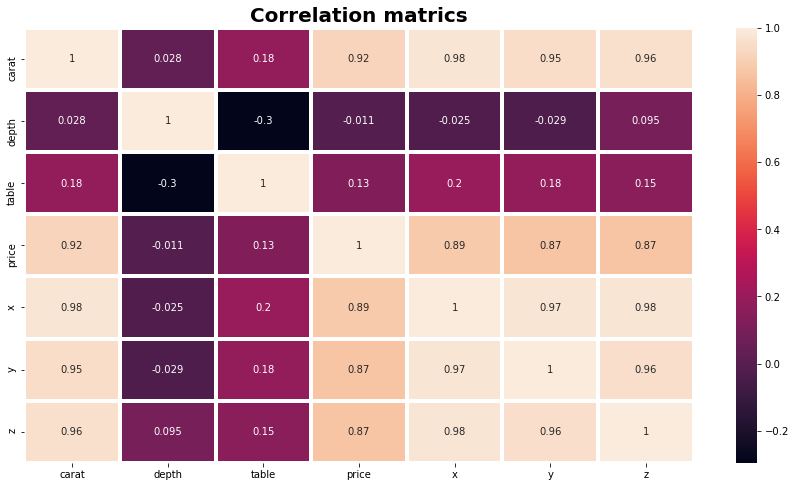

In [24]:
#Correlation with Price column
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), linewidths=3, annot=True)
plt.title("Correlation matrics", size=20, weight='bold')
plt.show()

"x", "y" and "z" show a high correlation to the target column.                
"depth", "cut" and "table" show low correlation. We could consider dropping but let's keep it.

# Statistical Analysis

In [25]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Hypothesis Testing

We want to compare the average price of the groups in the cut column. But as it seems, we do not use t test since the number of groups is more than 2. Since the number of data is large, we can apply the anova test directly without doing the normality test.

In [26]:
df['cut'].value_counts()

Ideal        21548
Premium      13780
Very Good    12081
Good          4902
Fair          1609
Name: cut, dtype: int64

In [27]:
data=df[['cut', 'price']]

In [28]:
data.head()

,cut,price
1,Ideal,326
2,Premium,326
3,Good,327
4,Premium,334
5,Good,335


In [29]:
ideal=data[data['cut']=='Ideal']['price']
premium=data[data['cut']=='Premium']['price']
very_good=data[data['cut']=='Very Good']['price']
good=data[data['cut']=='Good']['price']
fair=data[data['cut']=='Fair']['price']

H0: No significant difference between the mean of the groups                       
H1: The mean of at least one group differs from the others

In [30]:
fvalue, pvalue = stats.f_oneway(ideal, premium, very_good, good, fair)
print('%.3f'%pvalue)

0.000


H0 is rejected because p value is less than 0.05. That is, the mean of at least one group is different from the others.        
So, what is the difference in the average of which group or groups? How can we find this?                
For this we use a pairwise comparison test. So t test all combinations together

### Comparison test find different group

In [31]:
#Tukey test
tukey = pairwise_tukeyhsd(endog=data['price'],
                          groups=data['cut'],
                          alpha=0.05)

print(tukey)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
 group1   group2   meandiff p-adj    lower      upper   reject
--------------------------------------------------------------
   Fair      Good -431.0974 0.0014  -741.6104 -120.5844   True
   Fair     Ideal -900.5597    0.0 -1179.8657 -621.2538   True
   Fair   Premium  222.1836 0.2078   -62.5398   506.907  False
   Fair Very Good -375.8368 0.0032  -662.6459  -89.0278   True
   Good     Ideal -469.4623    0.0  -640.4809 -298.4437   True
   Good   Premium   653.281    0.0   473.5509  833.0112   True
   Good Very Good   55.2606 0.9234  -127.7557  238.2769  False
  Ideal   Premium 1122.7433    0.0  1004.8601 1240.6266   True
  Ideal Very Good  524.7229    0.0   401.8878   647.558   True
Premium Very Good -598.0204    0.0  -732.7203 -463.3206   True
--------------------------------------------------------------


 Now, let's check the results. When we look at the p values, we see that only the average of Fair and Premium groups and Good and Very Good groups are together.

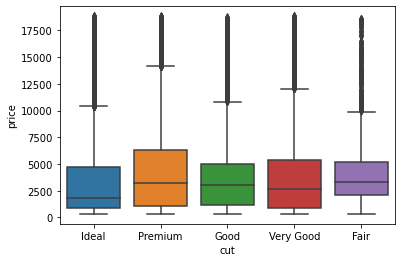

In [32]:
sns.boxplot(x='cut', y='price', data=data)
plt.show()

Even if the boxes intersect, if the variability is high in the series, there is a chance that the mean will diverge from the other.

Price value has significant (CI=95%) impact on the Cut, Clarity & Color of the Dimond

In [33]:
def hypotesis_testing(data, value, variable):
    frame=data[[variable, value]]
    formula=f'{value} ~ {variable}'
    model=ols(formula, frame).fit()
    print(model.summary(), "\n", "#"*50)
    
    p_value=np.round(model.f_pvalue, 3)
    print("p_value:", p_value)
    
    if p_value<0.05:
        print("Reject Null Hypothesis and accept the alternate hypothesis")
    else:
        print("Accept the Null Hypothesis")

In [34]:
print(cat_cols)

['clarity', 'cut', 'color']


In [35]:
hypotesis_testing(df, 'price', 'color')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     289.8
Date:                Sun, 12 Jun 2022   Prob (F-statistic):               0.00
Time:                        18:44:31   Log-Likelihood:            -5.2270e+05
No. Observations:               53920   AIC:                         1.045e+06
Df Residuals:                   53913   BIC:                         1.045e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3168.1064     47.685     66.438      0.0

In [36]:
tukey = pairwise_tukeyhsd(endog=df['price'],
                          groups=df['color'],
                          alpha=0.05)

print(tukey)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
     D      E   -91.354  0.761 -274.2079      91.5  False
     D      F  556.9738   -0.0  373.1078  740.8398   True
     D      G  828.7701   -0.0  650.9095 1006.6307   True
     D      H 1312.8357   -0.0 1123.3506 1502.3209   True
     D      I 1921.8676   -0.0 1710.9913 2132.7438   True
     D      J 2155.7116   -0.0 1895.9912  2415.432   True
     E      F  648.3277   -0.0  481.8731  814.7824   True
     E      G  920.1241   -0.0  760.3278 1079.9203   True
     E      H 1404.1897   -0.0 1231.5482 1576.8311   True
     E      I 2013.2215   -0.0 1817.3408 2209.1022   True
     E      J 2247.0655   -0.0 1999.3659 2494.7652   True
     F      G  271.7963    0.0   110.843  432.7497   True
     F      H  755.8619   -0.0  582.1489   929.575   True
     F      I 1364.8938   -0.0  1168.068 1561.7196   True
     F      J 

Now, let's check the results. When we look at the p values, we see that only the average of D and E groups and I and J groups are together.

In [37]:
hypotesis_testing(df, 'price', 'cut')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     174.6
Date:                Sun, 12 Jun 2022   Prob (F-statistic):          6.63e-149
Time:                        18:44:34   Log-Likelihood:            -5.2321e+05
No. Observations:               53920   AIC:                         1.046e+06
Df Residuals:                   53915   BIC:                         1.046e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         4357.5009     98.769  

In [38]:
tukey = pairwise_tukeyhsd(endog=df['price'],
                          groups=df['cut'],
                          alpha=0.05)

print(tukey)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
 group1   group2   meandiff p-adj    lower      upper   reject
--------------------------------------------------------------
   Fair      Good -431.0974 0.0014  -741.6104 -120.5844   True
   Fair     Ideal -900.5597    0.0 -1179.8657 -621.2538   True
   Fair   Premium  222.1836 0.2078   -62.5398   506.907  False
   Fair Very Good -375.8368 0.0032  -662.6459  -89.0278   True
   Good     Ideal -469.4623    0.0  -640.4809 -298.4437   True
   Good   Premium   653.281    0.0   473.5509  833.0112   True
   Good Very Good   55.2606 0.9234  -127.7557  238.2769  False
  Ideal   Premium 1122.7433    0.0  1004.8601 1240.6266   True
  Ideal Very Good  524.7229    0.0   401.8878   647.558   True
Premium Very Good -598.0204    0.0  -732.7203 -463.3206   True
--------------------------------------------------------------


Now, let's check the results. When we look at the p values, we see that only the average of Fair and Premium groups and Good and Very Good groups are together.

In [39]:
hypotesis_testing(df, 'price', 'clarity')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     215.0
Date:                Sun, 12 Jun 2022   Prob (F-statistic):          2.41e-316
Time:                        18:44:35   Log-Likelihood:            -5.2281e+05
No. Observations:               53920   AIC:                         1.046e+06
Df Residuals:                   53912   BIC:                         1.046e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        3926.1897    144.777     

In [40]:
tukey = pairwise_tukeyhsd(endog=df['price'],
                          groups=df['clarity'],
                          alpha=0.05)

print(tukey)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2  meandiff  p-adj    lower      upper    reject
------------------------------------------------------------
    I1     IF -1061.3506    0.0 -1582.8418  -539.8594   True
    I1    SI1    67.9229 0.9998  -383.1209   518.9668  False
    I1    SI2  1134.2505    0.0   678.1433  1590.3576   True
    I1    VS1   -87.0454 0.9991  -545.2548    371.164  False
    I1    VS2    -3.3229    1.0  -455.1622   448.5164  False
    I1   VVS1 -1406.6774    0.0 -1887.7735  -925.5813   True
    I1   VVS2  -642.4526 0.0009 -1112.1478  -172.7575   True
    IF    SI1  1129.2735    0.0   828.8235  1429.7235   True
    IF    SI2  2195.6011    0.0  1887.6021  2503.6001   True
    IF    VS1   974.3052    0.0   663.2014   1285.409   True
    IF    VS2  1058.0277    0.0   756.3848  1359.6706   True
    IF   VVS1  -345.3268 0.0482  -689.2499    -1.4037   True
    IF   VVS2    418.898 0.0027    91.1127   746.6832   True
   SI1    SI2  1066.3276

When we control the results, we clearly see that some groups have the same mean, while others are different.

In [41]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [42]:
df.shape

(53920, 10)

## Outliers

In [43]:
print(num_cols)

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z'], dtype='object')


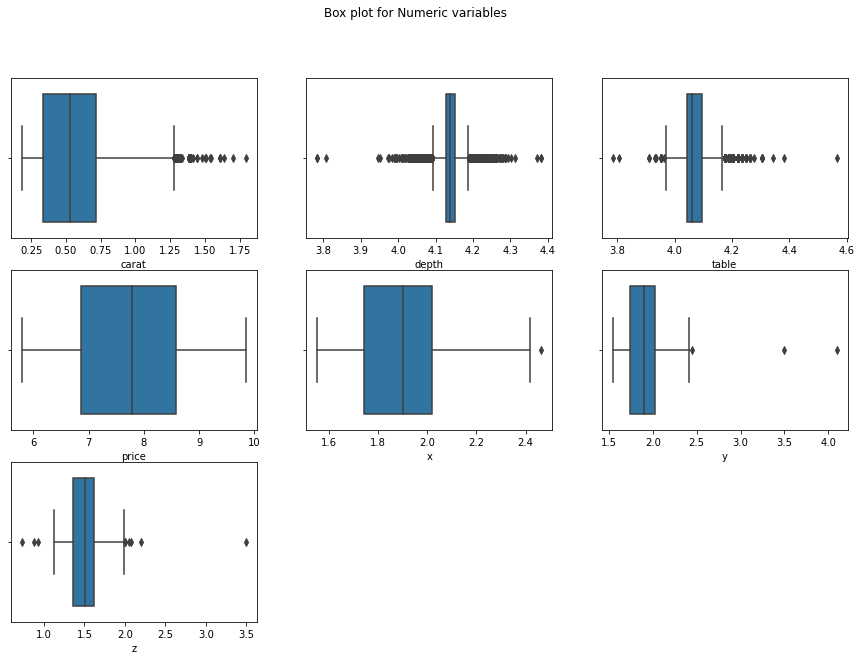

In [44]:
j=0
fig=plt.figure(figsize=(15,10))
plt.suptitle("Box plot for Numeric variables")
for col in num_cols:
    ax=plt.subplot(331+j)
    ax=sns.boxplot(data=df, x=np.log1p(df[col]))
    j=j+1

In [45]:
def drop_outliers(data, col):
    Q1=data[col].quantile(0.25)
    Q3=data[col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    
    return data[ (data[col]>=lower_bound) & (data[col]<=upper_bound) ]

In [46]:
df.shape

(53920, 10)

## Feature Encoding

In [47]:
cut_class_dict = {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5, }
clarity_dict   = {'SI2': 2, 'SI1': 3, 'VS1': 5, 'VS2': 4, 'VVS2': 6, 'VVS1': 7, 'I1': 1, 'IF': 8 }
color_dict     = {'J': 1, 'I': 2, 'H': 3, 'G': 4, 'F': 5, 'E': 6,'D': 7,} 

df['cut'] = df['cut'].map(cut_class_dict)
df['clarity'] = df['clarity'].map(clarity_dict)
df['color'] = df['color'].map(color_dict)

In [48]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
3,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
4,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
5,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75


In [49]:
X=df.drop('price', axis=1)
Y=df['price']

In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

# Standardization

In [51]:
scaler = PolynomialFeatures(degree=2, interaction_only=True)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [52]:
sc=StandardScaler()
sc.fit(X_train)

X_train=sc.transform(X_train)
X_test=sc.transform(X_test)

## Model Creation

In [53]:
lr=LinearRegression()
lr.fit(X_train, Y_train)

Y_train_pred=lr.predict(X_train)
Y_test_pred=lr.predict(X_test)

print(r2_score(Y_train, Y_train_pred))
print(r2_score(Y_test, Y_test_pred))

0.9626096074020289
0.7812815236532752


In [54]:
print(lr.get_params().keys())

dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize', 'positive'])


# Hyper-Parameter Optimization

In [55]:
parameters = {'fit_intercept': ['True', 'False'],
              'normalize': ['True', 'False'],
             'copy_X': ['True', 'False'],
             'positive': ['True', 'False'],
             }

lr=LinearRegression()

lr_cv = GridSearchCV(lr, parameters, cv=15, verbose = 1, n_jobs = -1)
lr_cv.fit(X_train, Y_train)


Fitting 15 folds for each of 16 candidates, totalling 240 fits


GridSearchCV(cv=15, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'copy_X': ['True', 'False'],
                         'fit_intercept': ['True', 'False'],
                         'normalize': ['True', 'False'],
                         'positive': ['True', 'False']},
             verbose=1)

In [56]:
print(lr_cv.best_estimator_)

LinearRegression(copy_X='True', fit_intercept='True', normalize='True',
                 positive='True')


# Final model 

In [57]:
lr_tuned=lr_cv.best_estimator_

In [58]:
lr_tuned.fit(X_train, Y_train)

Y_train_pred=lr_tuned.predict(X_train)
Y_test_pred=lr_tuned.predict(X_test)

print(r2_score(Y_train, Y_train_pred))
print(r2_score(Y_test, Y_test_pred))

0.9358061306406877
0.9387810772276013
